nulove

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets
from pandas.api.types import is_numeric_dtype
from datetime import datetime 
from scipy.stats import norm

%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
df = pd.read_csv('https://raw.githubusercontent.com/PULK4N/Data-analysis/master/Chengdu_pollution/ChengduPM20100101_20151231.csv')
df.drop(['PM_Shahepu','PM_Caotangsi'], axis=1,inplace=True)

In [3]:
df.dtypes

No                 int64
year               int64
month              int64
day                int64
hour               int64
season             int64
PM_US Post       float64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd              object
Iws              float64
precipitation    float64
Iprec            float64
dtype: object

In [4]:
df.shape

(52584, 15)

In [5]:
df['season'].unique()

array([4, 1, 2, 3])

In [6]:
df["season"].replace({1: "Spring", 2: "Summer",3: "Fall",4: "Winter"}, inplace=True)

#### Types of objects for cbwd column - air orientation

In [7]:
df['cbwd'].unique()

array(['cv', 'SW', 'SE', nan, 'NW', 'NE'], dtype=object)

In [8]:
df['Date']=pd.to_datetime(df[['year','month','day','hour']])
df.drop(['No'],inplace=True, axis=1)

In [9]:
df

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,Date
0,2010,1,1,0,Winter,NaN,4.00,81.20,1022.00,7.00,cv,1.00,0.00,0.00,2010-01-01 00:00:00
1,2010,1,1,1,Winter,NaN,4.00,86.99,1022.00,6.00,cv,1.00,0.00,0.00,2010-01-01 01:00:00
2,2010,1,1,2,Winter,NaN,4.00,86.99,1021.00,6.00,cv,1.00,0.00,0.00,2010-01-01 02:00:00
3,2010,1,1,3,Winter,NaN,3.00,86.89,1021.00,5.00,cv,1.00,0.00,0.00,2010-01-01 03:00:00
4,2010,1,1,4,Winter,NaN,2.00,86.79,1021.00,4.00,cv,1.00,0.00,0.00,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2015,12,31,19,Winter,262.00,7.00,87.28,1027.00,9.00,NW,2.00,0.00,0.00,2015-12-31 19:00:00
52580,2015,12,31,20,Winter,218.00,7.00,87.28,1028.00,9.00,NW,4.00,0.00,0.00,2015-12-31 20:00:00
52581,2015,12,31,21,Winter,213.00,7.00,87.28,1028.00,9.00,cv,1.00,0.00,0.00,2015-12-31 21:00:00
52582,2015,12,31,22,Winter,236.00,7.00,93.40,1028.00,8.00,NW,2.00,0.00,0.00,2015-12-31 22:00:00


In [10]:
df.set_index(['Date'],inplace=True)

In [11]:
df.head()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
Date,,,,,,,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,Winter,NaN,4.00,81.20,1022.00,7.00,cv,1.00,0.00,0.00
2010-01-01 01:00:00,2010,1,1,1,Winter,NaN,4.00,86.99,1022.00,6.00,cv,1.00,0.00,0.00
2010-01-01 02:00:00,2010,1,1,2,Winter,NaN,4.00,86.99,1021.00,6.00,cv,1.00,0.00,0.00
2010-01-01 03:00:00,2010,1,1,3,Winter,NaN,3.00,86.89,1021.00,5.00,cv,1.00,0.00,0.00
2010-01-01 04:00:00,2010,1,1,4,Winter,NaN,2.00,86.79,1021.00,4.00,cv,1.00,0.00,0.00


In [12]:
df.describe()

,year,month,day,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.00,52584.00,52584.00,52584.00,28900.00,52055.00,52049.00,52063.00,52057.00,52051.00,49629.00,49629.00
mean,2012.50,6.52,15.73,11.50,83.41,12.27,73.22,1014.62,17.70,4.35,0.11,0.59
std,1.71,3.45,8.80,6.92,57.24,7.53,17.82,8.11,7.84,6.42,1.02,5.12
min,2010.00,1.00,1.00,0.00,1.00,-16.00,12.78,991.00,-3.00,0.00,0.00,0.00
25%,2011.00,4.00,8.00,5.75,44.00,6.00,61.44,1008.00,11.00,1.00,0.00,0.00
50%,2012.00,7.00,16.00,11.50,68.00,13.00,77.01,1014.90,18.00,2.00,0.00,0.00
75%,2014.00,10.00,23.00,17.25,105.00,19.00,87.75,1021.00,24.00,5.00,0.00,0.00
max,2015.00,12.00,31.00,23.00,688.00,28.00,100.00,1041.00,38.00,120.00,57.00,169.40


In [13]:
df.isna().sum()

year                 0
month                0
day                  0
hour                 0
season               0
PM_US Post       23684
DEWP               529
HUMI               535
PRES               521
TEMP               527
cbwd               521
Iws                533
precipitation     2955
Iprec             2955
dtype: int64

In [14]:
df.columns = ['year', 'month', 'day', 'hour', 'season','PM2.5 concentration', 'Dew Point TEMP',
       'Humidity', 'Pressure', 'Temperature', 'Combined wind direction', 'Cumulated wind speed', 'Precipitation', 'Cumulated precipitation']

In [15]:
def lists_to_DataFrame(na_index,na_counter,counter):
    na_df1 = pd.DataFrame(na_index)
    na_df2 = pd.DataFrame(na_counter)
    na_df3 = pd.DataFrame(counter)
    na_df = pd.concat([na_df1, na_df2,na_df3], axis=1)
    na_df.columns = ['Date','NA Count','Count']
    #na_df.set_index('Date', inplace = True)
    return na_df

In [16]:
def year_month_data_len(df,year,month,column):
    return len(df[(df['year']==year) & (df['month']==month)][column])

def yearly_na(df,column):
    na_date = []
    na_counter = []
    counter = []
    for year in df['year'].unique():
        for month in df['month'].unique():
            #print(year,month,'num of values', year_month_data_len(df,year,month,column), 'NA values:' , df[(df['year']==year) & (df['month']==month)][column].isna().sum())
            year_month_string = str(year) + ' ' + str(month)
            counter.append(year_month_data_len(df,year,month,column))
            na_date.append(datetime.strptime(year_month_string, '%Y %m'))
            na_counter.append(df[(df['year']==year) & (df['month']==month)][column].isna().sum())
    return lists_to_DataFrame(na_date,na_counter,counter)

In [17]:
def plot_amout_of_na_values(df,column):
    na_values = yearly_na(df,column)
    ax = na_values.plot(x='Date', y='Count',title = column,xlabel='Date',ylabel = 'amount of values')
    na_values.plot(x='Date', y='NA Count', ax = ax)
    return ax.get_figure()

### Na data for each month for column __PM_US__ __Post__

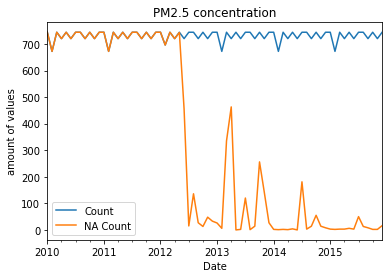

In [18]:
plot_amout_of_na_values(df,'PM2.5 concentration').savefig('./figure.png')

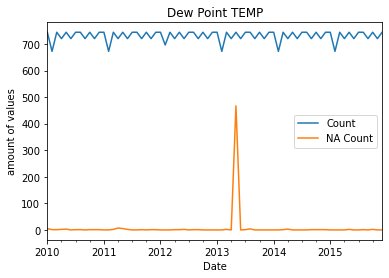

In [19]:
plot_amout_of_na_values(df,'Dew Point TEMP');

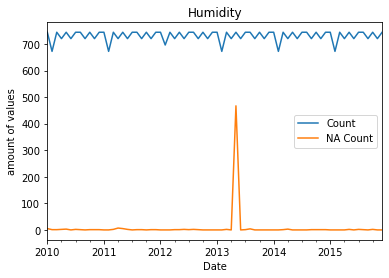

In [20]:
plot_amout_of_na_values(df,'Humidity');

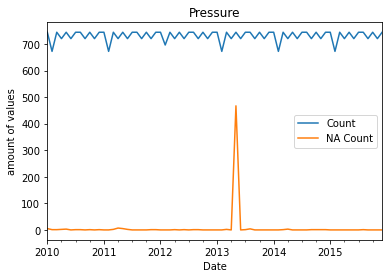

In [21]:
plot_amout_of_na_values(df,'Pressure');

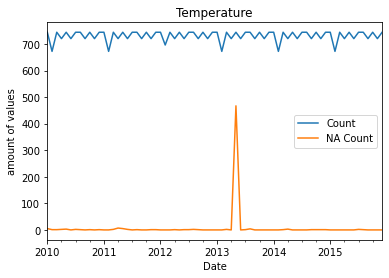

In [22]:
plot_amout_of_na_values(df,'Temperature');

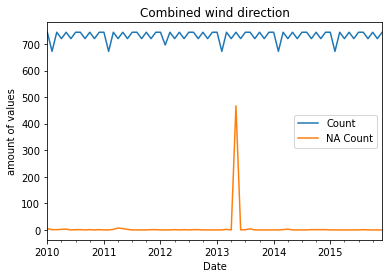

In [23]:
plot_amout_of_na_values(df,'Combined wind direction');

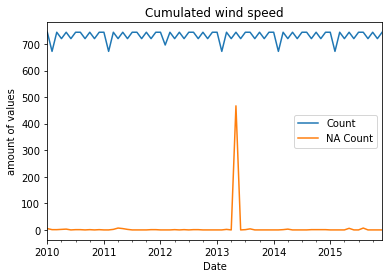

In [24]:
plot_amout_of_na_values(df,'Cumulated wind speed');

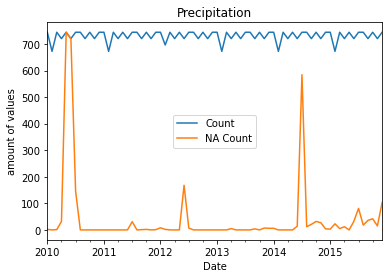

In [25]:
plot_amout_of_na_values(df,'Precipitation');

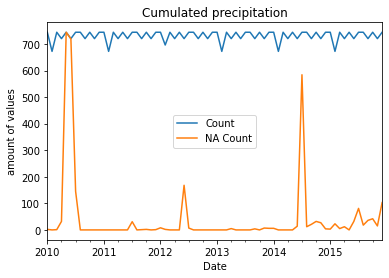

In [26]:
plot_amout_of_na_values(df,'Cumulated precipitation');

In [27]:
df.dropna(inplace=True)

In [28]:
df.describe()

,year,month,day,hour,PM2.5 concentration,Dew Point TEMP,Humidity,Pressure,Temperature,Cumulated wind speed,Precipitation,Cumulated precipitation
count,27368.00,27368.00,27368.00,27368.00,27368.00,27368.00,27368.00,27368.00,27368.00,27368.00,27368.00,27368.00
mean,2013.74,6.97,15.77,11.52,84.66,12.54,72.68,1014.75,18.13,4.27,0.11,0.64
std,1.05,3.48,8.78,6.94,57.96,7.50,18.29,8.06,7.73,6.31,1.03,5.74
min,2012.00,1.00,1.00,0.00,1.00,-16.00,12.78,991.00,-2.00,0.00,0.00,0.00
25%,2013.00,4.00,8.00,5.00,44.00,6.00,60.51,1008.00,12.00,1.00,0.00,0.00
50%,2014.00,7.00,16.00,12.00,69.00,13.00,76.35,1015.00,19.00,2.00,0.00,0.00
75%,2015.00,10.00,23.00,18.00,107.00,19.00,87.75,1021.00,24.00,5.00,0.00,0.00
max,2015.00,12.00,31.00,23.00,688.00,28.00,100.00,1041.00,38.00,93.00,51.70,169.40


#### Iprec seems to have outliers because of a big difference between mean value and max value

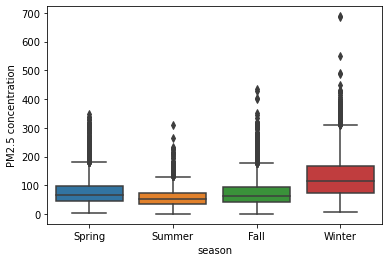

In [29]:
_, sns_ax = plt.subplots()
sns.boxplot(data = df, x = 'season', y ='PM2.5 concentration',ax = sns_ax)
plt.savefig('seasons.png')

In [30]:
df[df['PM2.5 concentration']>380]['PM2.5 concentration'].count()/df['PM2.5 concentration'].count()

0.0009865536392867583

In [31]:
df = df[df['PM2.5 concentration']<380]

<AxesSubplot:xlabel='year', ylabel='Cumulated wind speed'>

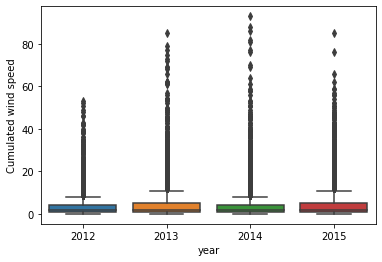

In [32]:
_, sns_ax = plt.subplots()
sns.boxplot(data = df, x = 'year', y ='Cumulated wind speed',ax = sns_ax)

In [33]:
df[df['Cumulated wind speed']>40]['Cumulated wind speed'].count()/df['Cumulated wind speed'].count()

0.005120514977506309

In [34]:

df = df[df['Cumulated wind speed']<40]

<AxesSubplot:xlabel='year', ylabel='Precipitation'>

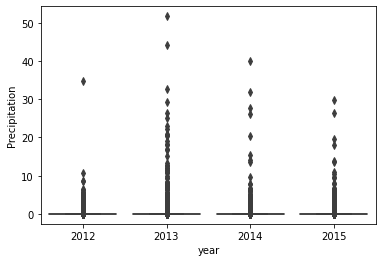

In [35]:
_, sns_ax = plt.subplots()
sns.boxplot(data = df, x = 'year', y ='Precipitation',ax = sns_ax)

In [36]:
df[df['Precipitation']>4]['Precipitation'].count()/df['Precipitation'].count()

0.0054058029639980874

In [37]:
df = df[df['Precipitation']<4]

<AxesSubplot:xlabel='year', ylabel='Cumulated precipitation'>

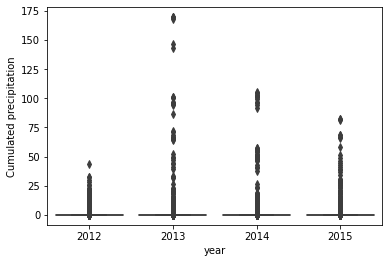

In [38]:
_, sns_ax = plt.subplots()
sns.boxplot(data = df, x = 'year', y ='Cumulated precipitation',ax = sns_ax)


In [39]:
df[df['Cumulated precipitation']>15]['Cumulated precipitation'].count()/df['Cumulated precipitation'].count()

0.006619577678340298

In [40]:
df = df[df['Cumulated precipitation']<15]

<AxesSubplot:xlabel='season', ylabel='PM2.5 concentration'>

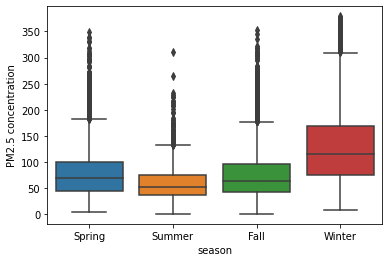

In [41]:
sns.boxplot(data = df, x = 'season', y ='PM2.5 concentration')

In [42]:
df[['PM2.5 concentration','year']].groupby('year').mean()

,PM2.5 concentration
year,
2012,86.75
2013,100.62
2014,83.14
2015,73.48


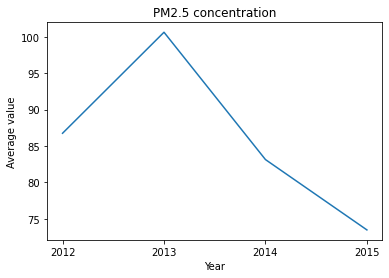

In [43]:
fig = plt.figure()
plt.plot(df[['PM2.5 concentration','year']].groupby('year').mean())
plt.xticks([2012,2013,2014,2015],[2012,2013,2014,2015])
plt.xlabel('Year')
plt.ylabel('Average value')
plt.title('PM2.5 concentration')
plt.savefig('./cestice.png')

In [44]:
df['PM2.5 concentration'].describe()

count   26861.00
mean       85.14
std        56.93
min         1.00
25%        45.00
50%        70.00
75%       108.00
max       379.00
Name: PM2.5 concentration, dtype: float64

In [45]:
df['PM2.5 concentration'].describe()

count   26861.00
mean       85.14
std        56.93
min         1.00
25%        45.00
50%        70.00
75%       108.00
max       379.00
Name: PM2.5 concentration, dtype: float64

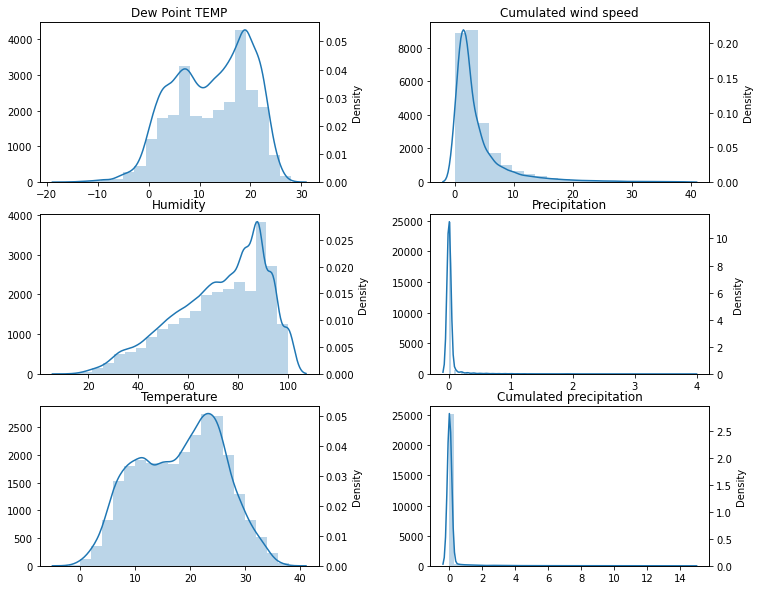

In [46]:
fig, axs = plt.subplots(3,2,figsize=(12, 10))
fig.subplots_adjust(wspace=0.4)

axs[0, 0].hist(df['Dew Point TEMP'],bins=20,alpha = 0.3);
axs[0, 0].set_title('Dew Point TEMP')
ax2 = axs[0, 0].twinx()
sns.kdeplot(df['Dew Point TEMP'],ax=ax2,shade=False);

axs[1, 0].hist(df['Humidity'],bins=20,alpha = 0.3);
axs[1, 0].set_title('Humidity')
ax2 = axs[1, 0].twinx()
sns.kdeplot(df['Humidity'],ax=ax2,);

axs[2, 0].hist(df['Temperature'],bins=20,alpha = 0.3);
axs[2, 0].set_title('Temperature')
ax2 = axs[2, 0].twinx()
sns.kdeplot(df['Temperature'],ax=ax2,);

axs[0, 1].hist(df['Cumulated wind speed'],bins=20,alpha = 0.3);
axs[0, 1].set_title('Cumulated wind speed')
ax2 = axs[0, 1].twinx()
sns.kdeplot(df['Cumulated wind speed'],ax=ax2,);

axs[1, 1].hist(df['Precipitation'],bins=100,alpha = 0.3);
axs[1, 1].set_title('Precipitation')
ax2 = axs[1, 1].twinx()
sns.kdeplot(df['Precipitation'],ax=ax2,);

axs[2, 1].hist(df['Cumulated precipitation'],bins=50,alpha = 0.3);
axs[2, 1].set_title('Cumulated precipitation')
ax2 = axs[2, 1].twinx()
sns.kdeplot(df['Cumulated precipitation'],ax=ax2,);

fig.savefig('Column_analysis')

In [47]:
corr = df.drop([ 'year', 'month', 'day', 'hour'],axis=1).corr()
corr = corr[['PM2.5 concentration']].drop('PM2.5 concentration')
df.shape

(26861, 14)

In [48]:
corr

,PM2.5 concentration
Dew Point TEMP,-0.32
Humidity,0.15
Pressure,0.25
Temperature,-0.41
Cumulated wind speed,-0.19
Precipitation,-0.09
Cumulated precipitation,-0.11


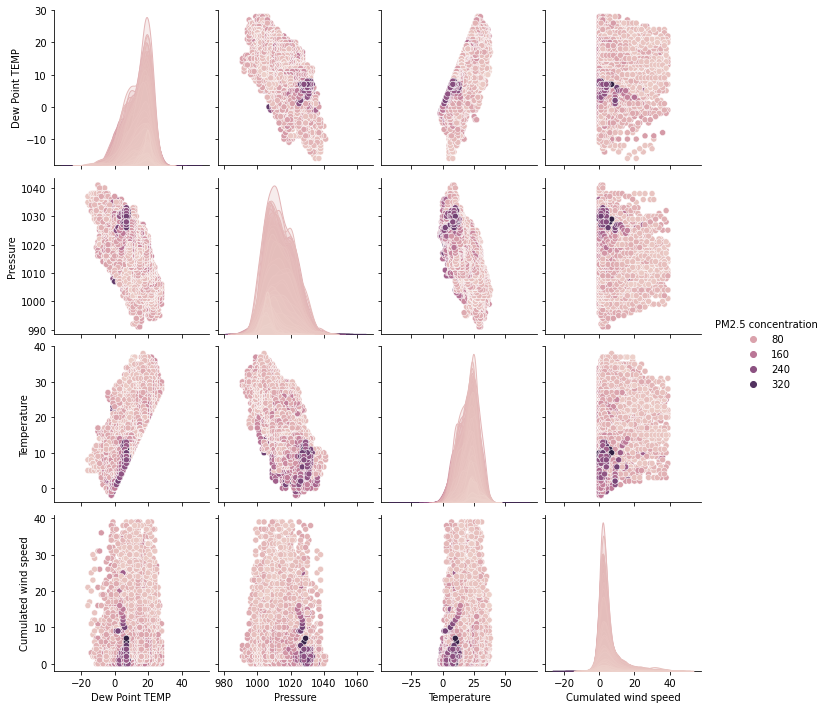

In [49]:
to_plot_df = df.drop(['year', 'month', 'day', 'hour', 'Cumulated precipitation', 'Precipitation', 'Humidity'],axis=1)
sns_plot = sns.pairplot(to_plot_df, hue='PM2.5 concentration', height=2.5)

In [50]:
sns_plot.figure.savefig("corr.png")

In [51]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) # np.mean((y_test-y_predicted)**2)
    mae = mean_absolute_error(y_test, y_predicted) # np.mean(np.abs(y_test-y_predicted))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    

    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [52]:
df.columns

Index(['year', 'month', 'day', 'hour', 'season', 'PM2.5 concentration',
       'Dew Point TEMP', 'Humidity', 'Pressure', 'Temperature',
       'Combined wind direction', 'Cumulated wind speed', 'Precipitation',
       'Cumulated precipitation'],
      dtype='object')

In [53]:
new_df = pd.get_dummies(df, prefix=['','Cws'], prefix_sep=['','_'],
columns=['season','Combined wind direction'])
new_df.head(5)

,year,month,day,hour,PM2.5 concentration,Dew Point TEMP,Humidity,Pressure,Temperature,Cumulated wind speed,...,Cumulated precipitation,Fall,Spring,Summer,Winter,Cws_NE,Cws_NW,Cws_SE,Cws_SW,Cws_cv
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-14 14:00:00,2012,5,14,14,46.00,4.00,24.24,1013.90,26.00,2.00,...,0.00,0,1,0,0,0,0,0,0,1
2012-06-04 23:00:00,2012,6,4,23,69.00,18.00,88.28,1008.10,20.00,4.00,...,0.00,0,0,1,0,0,0,0,0,1
2012-06-05 15:00:00,2012,6,5,15,98.00,19.00,88.37,1004.10,21.00,4.00,...,0.00,0,0,1,0,0,0,0,0,1
2012-06-05 16:00:00,2012,6,5,16,89.00,20.00,83.25,1003.10,23.00,4.00,...,0.00,0,0,1,0,0,0,0,0,1
2012-06-05 17:00:00,2012,6,5,17,66.00,18.00,73.50,1003.10,23.00,2.00,...,0.00,0,0,1,0,1,0,0,0,0


In [54]:
df = new_df
x = df.drop(['PM2.5 concentration'],axis=1)
y = df['PM2.5 concentration']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

Mean squared error:  2067.5090398465118
Mean absolute error:  33.55222548927726
Root mean squared error:  45.469869582466494
R2 score:  0.3170929362060322
R2 adjusted score:  0.31652745194834664
        y  y_pred
0  132.00   71.62
1   45.00   83.89
2   89.00  117.12
3  132.00   76.08
4   49.00   94.56
5   95.00  147.28
6  195.00   91.29
7  145.00  114.44
8   53.00  122.31
9  102.00   83.19
10  90.00   90.32
11  51.00   82.37
12 149.00  102.20
13  53.00   78.30
14 140.00  117.11
15  34.00   89.16
16  52.00   78.66
17  67.00   77.00
18  52.00   60.92
19  25.00   27.52


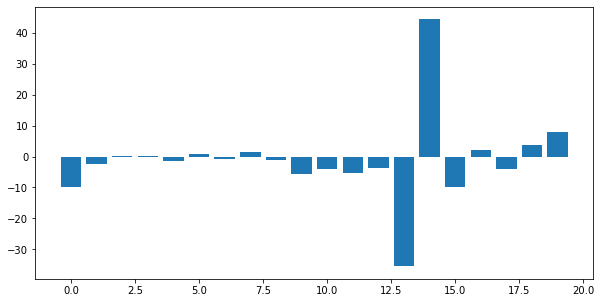

koeficijenti:  [ -9.88489932  -2.49739755   0.2992343    0.25414662  -1.36306382
   0.85827521  -0.67657692   1.34886404  -1.20141153  -5.72749271
  -3.89356092  -5.24267486  -3.58383703 -35.5446867   44.37119859
  -9.75485975   2.25784553  -4.12652888   3.73125247   7.89229062]


In [55]:
first_regression_model = LinearRegression(fit_intercept=True)


first_regression_model.fit(x_train, y_train)


y_predicted = first_regression_model.predict(x_test)


model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])


plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)

In [56]:
# Selekcija obelezja
import statsmodels.api as sm
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

/home/nikola/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PM2.5 concentration   R-squared:                       0.327
Model:                             OLS   Adj. R-squared:                  0.326
Method:                  Least Squares   F-statistic:                     651.8
Date:                 Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                         00:30:43   Log-Likelihood:            -1.2731e+05
No. Observations:                24174   AIC:                         2.547e+05
Df Residuals:                    24155   BIC:                         2.548e+05
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.422e+04    414.435     34.313      0.000    1.34e+04     1.5e+04
year                       -9.8849      0.301    -32.838      0.000     -10.475      -9.295
month                      -2.4974      0.115    -21.778      0.000      -2.722      -2.273
day                         0.2992      0.034      8.689      0.000       0.232       0.367
hour                        0.2541      0.048      5.252      0.000       0.159       0.349
Dew Point TEMP             -1.3631      0.366     -3.723      0.000      -2.081      -0.645
Humidity                    0.8583      0.092      9.334      0.000       0.678       1.038
Pressure                   -0.6766      0.075     -9.055      0.000      -0.823      -0.530
Temperature                 1.3489      0.357      3.782      0.000       0.650       2.048
Cumulated wind speed       -1.2014      0.066    -18.089      0.000      -1.332      -1.071
Precipitation              -5.7275      1.585     -3.614      0.000      -8.834      -2.621
Cumulated precipitation    -3.8936      0.392     -9.931      0.000      -4.662      -3.125
Fall                     3549.8539    103.578     34.272      0.000    3346.835    3752.872
Spring                   3551.5127    103.707     34.246      0.000    3348.241    3754.785
Summer                   3519.5519    103.537     33.993      0.000    3316.612    3722.491
Winter                   3599.4678    103.626     34.735      0.000    3396.354    3802.582
Cws_NE                   2834.3224     82.886     34.195      0.000    2671.861    2996.784
Cws_NW                   2846.3351     82.890     34.339      0.000    2683.865    3008.806
Cws_SE                   2839.9507     82.861     34.274      0.000    2677.539    3002.363
Cws_SW                   2847.8085     82.904     34.351      0.000    2685.311    3010.306
Cws_cv                   2851.9696     82.913     34.397      0.000    2689.455    3014.484
==============================================================================
Omnibus:                     4652.920   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10868.177
Skew:                           1.091   Prob(JB):                         0.00
Kurtosis:                       5.455   Cond. No.                     1.04e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,year,month,day,hour,Dew Point TEMP,Humidity,Pressure,Temperature,Cumulated wind speed,Precipitation,Cumulated precipitation,Fall,Spring,Summer,Winter,Cws_NE,Cws_NW,Cws_SE,Cws_SW,Cws_cv
0,-0.70,1.44,-0.43,-0.07,-1.40,-0.60,0.77,-1.17,-0.38,-0.17,-0.17,-0.64,-0.49,-0.59,1.70,-0.33,2.14,-0.25,-0.48,-0.95
1,0.24,0.87,1.16,0.79,0.47,-0.20,0.39,0.50,-0.38,-0.17,-0.17,1.56,-0.49,-0.59,-0.59,-0.33,-0.47,-0.25,-0.48,1.05
2,0.24,1.44,-1.00,-0.80,-1.13,1.14,1.51,-1.69,-0.78,-0.17,-0.17,-0.64,-0.49,-0.59,1.70,-0.33,-0.47,-0.25,-0.48,1.05
3,-0.70,0.58,-0.66,0.94,0.87,-0.39,-0.35,1.02,1.39,-0.17,-0.17,1.56,-0.49,-0.59,-0.59,-0.33,-0.47,-0.25,2.09,-0.95
4,-0.70,1.44,-1.11,0.50,-1.80,-2.36,0.14,-0.14,-0.38,-0.17,-0.17,-0.64,-0.49,-0.59,1.70,3.00,-0.47,-0.25,-0.48,-0.95


Mean squared error:  2067.466227900886
Mean absolute error:  33.53286041638027
Root mean squared error:  45.469398807339495
R2 score:  0.3171070771744723
R2 adjusted score:  0.3165416046262791
        y  y_pred
0  132.00   71.13
1   45.00   82.92
2   89.00  115.90
3  132.00   75.79
4   49.00   94.66
5   95.00  146.38
6  195.00   91.84
7  145.00  115.54
8   53.00  121.16
9  102.00   81.86
10  90.00   90.75
11  51.00   82.50
12 149.00  102.86
13  53.00   77.50
14 140.00  115.63
15  34.00   89.33
16  52.00   78.56
17  67.00   76.66
18  52.00   60.91
19  25.00   27.77


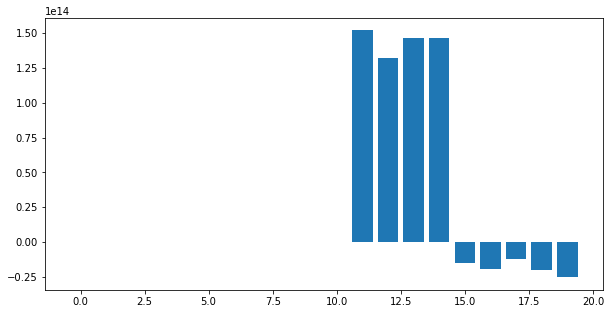

koeficijenti:  [-1.05576461e+01 -9.45279492e+00  2.60020165e+00  1.72929804e+00
 -1.02756674e+01  1.55576406e+01 -5.51585830e+00  1.04545330e+01
 -6.15266819e+00 -1.39387190e+00 -3.92109492e+00  1.52055344e+14
  1.32383490e+14  1.46207402e+14  1.46384203e+14 -1.52472925e+13
 -1.95096327e+13 -1.20447034e+13 -1.97980154e+13 -2.53960780e+13]


In [58]:
regression_model_std = LinearRegression()

regression_model_std.fit(x_train_std, y_train)

y_predicted = regression_model_std.predict(x_test_std)

model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])


plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_std.coef_)),regression_model_std.coef_)
plt.show()
print("koeficijenti: ", regression_model_std.coef_)

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x0 x15', 'x0 x16', 'x0 x17', 'x0 x18', 'x0 x19', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x1 x14', 'x1 x15', 'x1 x16', 'x1 x17', 'x1 x18', 'x1 x19', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x14', 'x2 x15', 'x2 x16', 'x2 x17', 'x2 x18', 'x2 x19', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x3 x14', 'x3 x15', 'x3 x16', 'x3 x17', 'x3 x18', 'x3 x19', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x4 x14', 'x4 x15', 'x4 x16', 'x4 x17', 'x4 x18', 'x4 x19', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11'

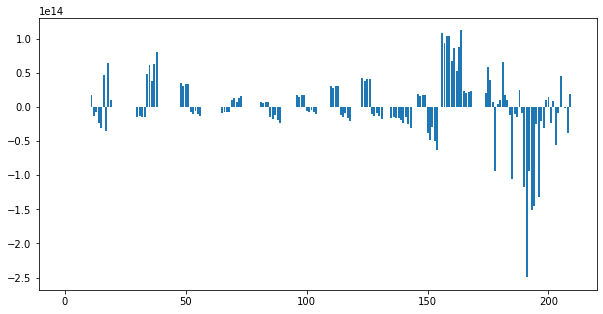

koeficijenti:  [-1.41271723e+01  2.33118072e+01  4.12159073e+00  1.79412708e-01
 -4.15312365e+02  2.39219597e+02 -2.04489225e+00  4.53561131e+02
 -5.44761312e+00 -5.49554763e+00 -8.56865458e+00  1.67947793e+13
 -1.35637553e+13 -7.63718015e+12 -2.32523490e+13 -3.11413629e+13
  4.62508400e+13 -3.56407504e+13  6.42439469e+13  1.00108468e+13
  1.52733824e+00  1.54996328e+00  2.89629904e-01  1.05301478e+00
  1.03899758e+00  5.57560235e+00  4.40180046e+00  1.17532492e+00
  8.90274148e-01  3.69955477e-01 -1.47507972e+13 -1.28424425e+13
 -1.41834919e+13 -1.42006432e+13  4.82632463e+13  6.17551089e+13
  3.81258826e+13  6.26679452e+13  8.03878568e+13  5.75381022e+00
 -1.58152250e+00  5.16696271e+00 -6.53761004e+00  3.13156373e+00
 -5.07518402e+00  1.69321378e+00  3.01062163e+00 -6.41601049e-01
  3.45921417e+13  3.01168531e+13  3.32617521e+13  3.33019738e+13
 -7.67829619e+12 -9.82474353e+12 -6.06552276e+12 -9.96996849e+12
 -1.27890646e+13  5.22263688e-01  5.08147058e+00  3.75181102e-01
  2.647311

In [59]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

print(poly.get_feature_names())

regression_model_inter = LinearRegression()

regression_model_inter.fit(x_inter_train, y_train)

y_predicted = regression_model_inter.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
plt.show()

Mean squared error:  1273.25961483949
Mean absolute error:  26.52316292129931
Root mean squared error:  35.68276355384333
R2 score:  0.579436912603765
R2 adjusted score:  0.5462093687618091
        y  y_pred
0  132.00   79.50
1   45.00   20.85
2   89.00  115.14
3  132.00  100.86
4   49.00   59.29
5   95.00  127.33
6  195.00  149.34
7  145.00  128.79
8   53.00  136.00
9  102.00   82.42
10  90.00  103.85
11  51.00   71.63
12 149.00   97.48
13  53.00   76.71
14 140.00  164.75
15  34.00   50.48
16  52.00   90.23
17  67.00   99.76
18  52.00   79.71
19  25.00   52.82


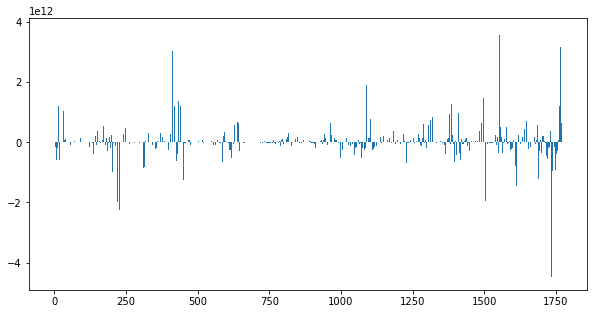

koeficijenti:  [ 3.46907147e+09 -2.11078690e+11  8.47582050e+10 ...  5.32352415e+11
 -6.63829450e+11  6.31346066e+11]


In [60]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

# y=b0+b1x1+b2x2+...+bnxn+c1x1x2+c2x1x3+...+d1x1^2+d2x2^2+...+dnxn^2


regression_model_degree = LinearRegression()

regression_model_degree.fit(x_inter_train, y_train)

y_predicted = regression_model_degree.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
plt.show()
print("koeficijenti: ", regression_model_degree.coef_)

Mean squared error:  2067.478253583519
Mean absolute error:  33.55143239470293
Root mean squared error:  45.46953104644383
R2 score:  0.31710310504015116
R2 adjusted score:  0.31653762920281425
        y  y_pred
0  132.00   71.61
1   45.00   83.88
2   89.00  117.07
3  132.00   76.10
4   49.00   94.55
5   95.00  147.22
6  195.00   91.31
7  145.00  114.46
8   53.00  122.26
9  102.00   83.18
10  90.00   90.35
11  51.00   82.38
12 149.00  102.21
13  53.00   78.32
14 140.00  117.08
15  34.00   89.16
16  52.00   78.62
17  67.00   77.03
18  52.00   60.95
19  25.00   27.57


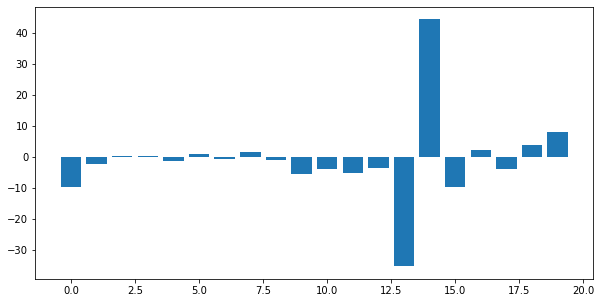

koeficijenti:  [ -9.88216484  -2.49859497   0.29938604   0.25451592  -1.36580942
   0.8580668   -0.67646942   1.34442096  -1.20189746  -5.71001223
  -3.89686727  -5.22828841  -3.58636941 -35.46498873  44.27964656
  -9.74380969   2.25305313  -4.11864168   3.72331865   7.88607959]


In [61]:
ridge_model = Ridge(alpha=3.1)

ridge_model.fit(x_train, y_train)

y_predicted = ridge_model.predict(x_test)

model_evaluation(y_test, y_predicted, x_train.shape[0], x_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

/home/nikola/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15287838.238791894, tolerance: 7891.485032286756
  model = cd_fast.enet_coordinate_descent(


Mean squared error:  1257.2346535743861
Mean absolute error:  26.52132958048507
Root mean squared error:  35.45750489775593
R2 score:  0.5847300257336483
R2 adjusted score:  0.5519206763406455
        y  y_pred
0  132.00   80.96
1   45.00   20.86
2   89.00  117.70
3  132.00  100.61
4   49.00   58.11
5   95.00  127.34
6  195.00  145.95
7  145.00  119.55
8   53.00  135.07
9  102.00   85.87
10  90.00  102.79
11  51.00   74.74
12 149.00   98.01
13  53.00   79.87
14 140.00  167.16
15  34.00   50.67
16  52.00   89.95
17  67.00  100.11
18  52.00   86.36
19  25.00   47.40


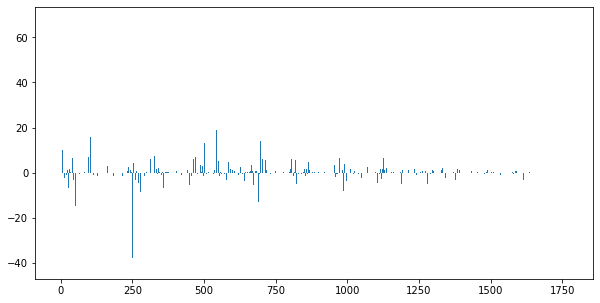

koeficijenti:  [ 0.18953279  0.         -0.         ...  0.         -0.
  0.        ]


<Figure size 432x288 with 0 Axes>

In [62]:
# Model initialization
lasso_model = Lasso(alpha=0.01)

# Fit the data(train the model)
lasso_model.fit(x_inter_train, y_train)

# Predict
y_predicted = lasso_model.predict(x_inter_test)

# Evaluation
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])


fig = plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
plt.show()
plt.savefig('Predict')
print("koeficijenti: ", lasso_model.coef_)

In [63]:
fig.savefig('predict')